<a href="https://colab.research.google.com/github/anujayavidmal2002/EN3150_PatternRocognition/blob/main/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
X = np.array([0,1,2,3,4,5,6,7,8,9])
Y = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

In [12]:
coeffs = np.polyfit(X, Y, 1)   # slope, intercept
slope, intercept = coeffs
print(f"Model: y = {slope:.3f}x + {intercept:.3f}")

Model: y = -3.557x + 3.917


In [13]:
Y_pred = slope * X + intercept

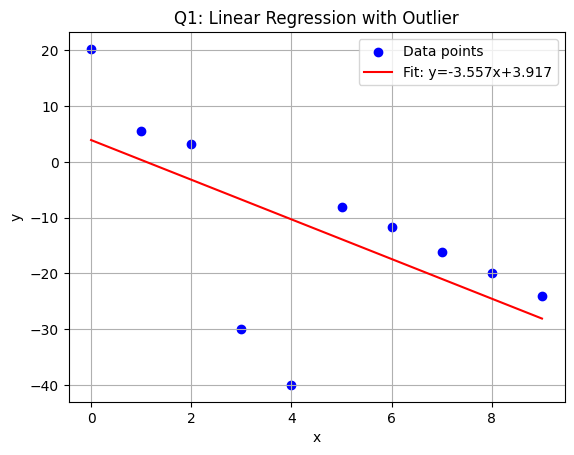

In [15]:
plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, Y_pred, color="red", label=f"Fit: y={slope:.3f}x+{intercept:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Q1: Linear Regression with Outlier")
plt.legend()
plt.grid(True)
plt.show()

# Question 2

In [16]:
# Define models
def model1(x): return -4*x + 12
def model2(x): return -3.55*x + 3.91

In [18]:
def custom_loss(y_true, y_pred, beta):
    """
    Computes L(theta, beta) = (1/N) * sum( (error^2) / (error^2 + beta^2) )

    Parameters:
    y_true : array-like of shape (N,) - Actual values
    y_pred : array-like of shape (N,) - Predicted values
    beta   : float - smoothing parameter

    Returns:
    float : computed loss
    """
    errors = y_true - y_pred
    loss_terms = (errors**2) / (errors**2 + beta**2)
    return np.mean(loss_terms)

In [19]:
betas = [1.0, 1e-6, 1e3]

In [22]:
rows = []
for b in betas:
    L1 = custom_loss(Y, model1(X), b)
    L2 = custom_loss(Y, model2(X), b)
    rows.append({"beta": b, "L(Model 1: y=-4x+12)": L1, "L(Model 2: y=-3.55x+3.91)": L2})

In [25]:
df_losses = pd.DataFrame(rows)
print("Average robust losses:")
print(df_losses.to_string(index=False))

Average robust losses:
       beta  L(Model 1: y=-4x+12)  L(Model 2: y=-3.55x+3.91)
   1.000000              0.435416                   0.972847
   0.000001              1.000000                   1.000000
1000.000000              0.000227                   0.000188


# Question 2

/tmp/ipython-input-3380558194.py:8: RuntimeWarning: divide by zero encountered in log
  bce = - (y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
/tmp/ipython-input-3380558194.py:8: RuntimeWarning: invalid value encountered in multiply
  bce = - (y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred))


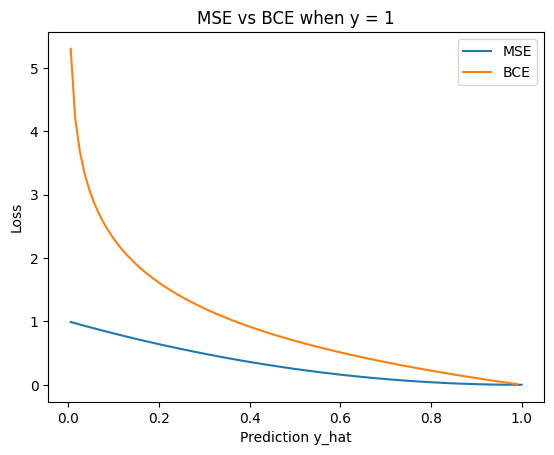

In [26]:
import numpy as np
import matplotlib.pyplot as plt

y_true = 1
y_pred = np.linspace(0.005, 1, 100)

mse = (y_true - y_pred)**2
bce = - (y_true * np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

plt.plot(y_pred, mse, label='MSE')
plt.plot(y_pred, bce, label='BCE')
plt.xlabel('Prediction y_hat')
plt.ylabel('Loss')
plt.title('MSE vs BCE when y = 1')
plt.legend()
plt.show()


# Data pre-processing

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:


def generate_signal(signal_length, num_nonzero):
  signal = np.zeros(signal_length)
  nonzero_indices = np.random.choice(signal_length, num_nonzero,
  replace=False)
  nonzero_values = 10*np.random.randn(num_nonzero)
  signal[nonzero_indices] = nonzero_values

  return signal

In [39]:

signal_length = 100 # Total length of the signal
num_nonzero = 10
 # Number of non-zero elements in the signal
your_index_no= 220662
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10



In [43]:
if your_index_no % 10 == 0:
  sparse_signal[10] = np.random.randn(1) + 30
sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length )

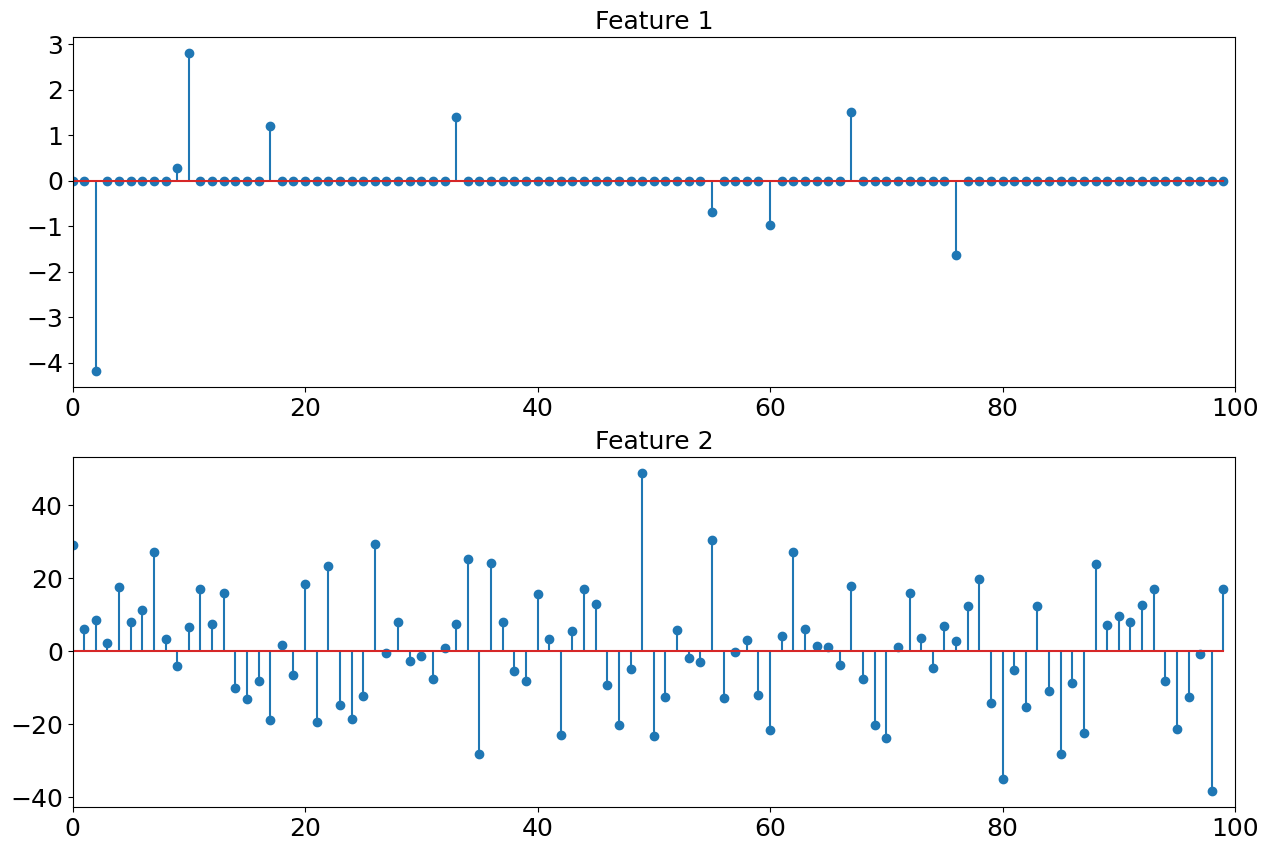

In [44]:

plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

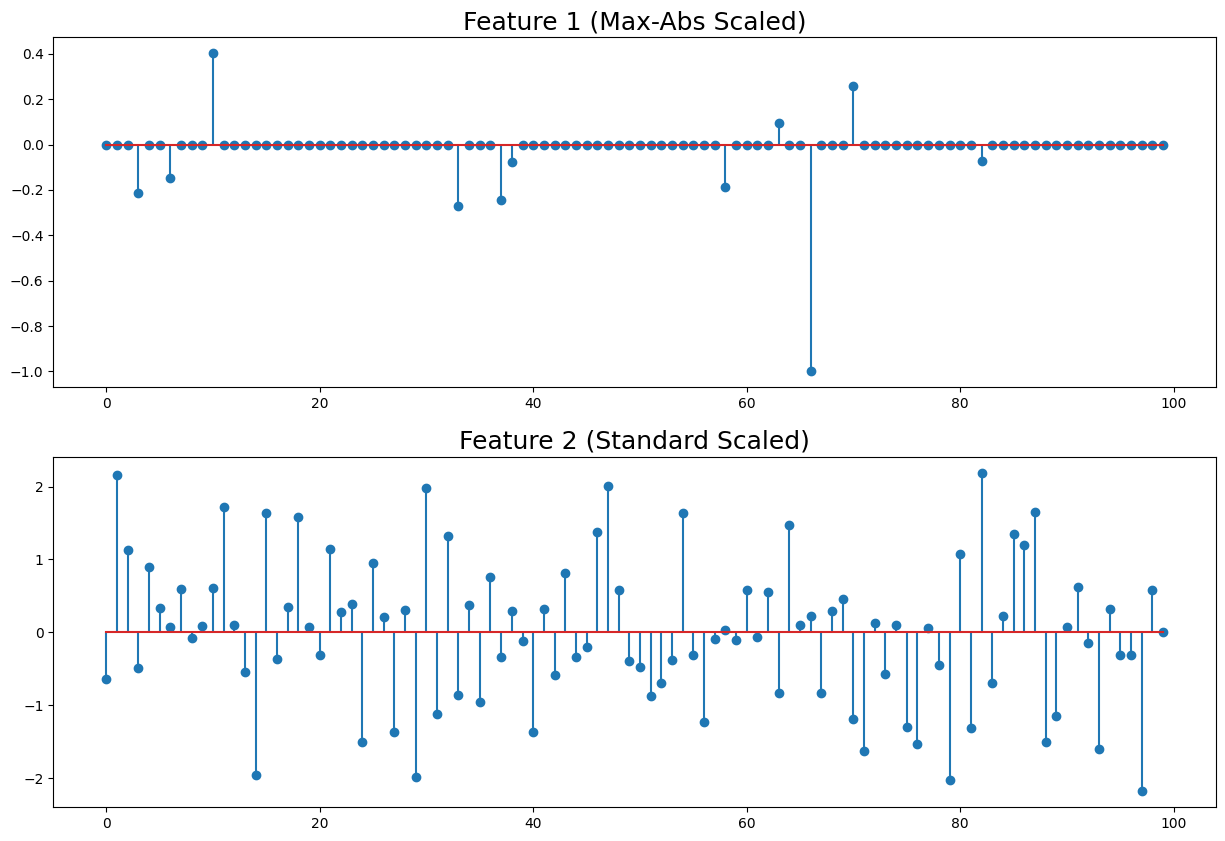

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# --------------------
# Step 1: Generate data
# --------------------
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100
num_nonzero = 10
your_index_no = 220662

# Feature 1: sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

# Feature 2: Gaussian noise
epsilon = np.random.normal(0, 15, signal_length)

# --------------------
# Step 2: Scaling
# --------------------
# Feature 1: Max-Abs Scaling
scaler1 = MaxAbsScaler()
feature1_scaled = scaler1.fit_transform(sparse_signal.reshape(-1,1)).flatten()

# Feature 2: Standard Scaling
scaler2 = StandardScaler()
feature2_scaled = scaler2.fit_transform(epsilon.reshape(-1,1)).flatten()

# --------------------
# Step 3: Plot scaled features
# --------------------
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
plt.stem(feature1_scaled)
plt.title("Feature 1 (Max-Abs Scaled)", fontsize=18)
plt.subplot(2, 1, 2)
plt.stem(feature2_scaled)
plt.title("Feature 2 (Standard Scaled)", fontsize=18)
plt.show()
